![logo](https://infotec.repositorioinstitucional.mx/jspui/retrieve/865)

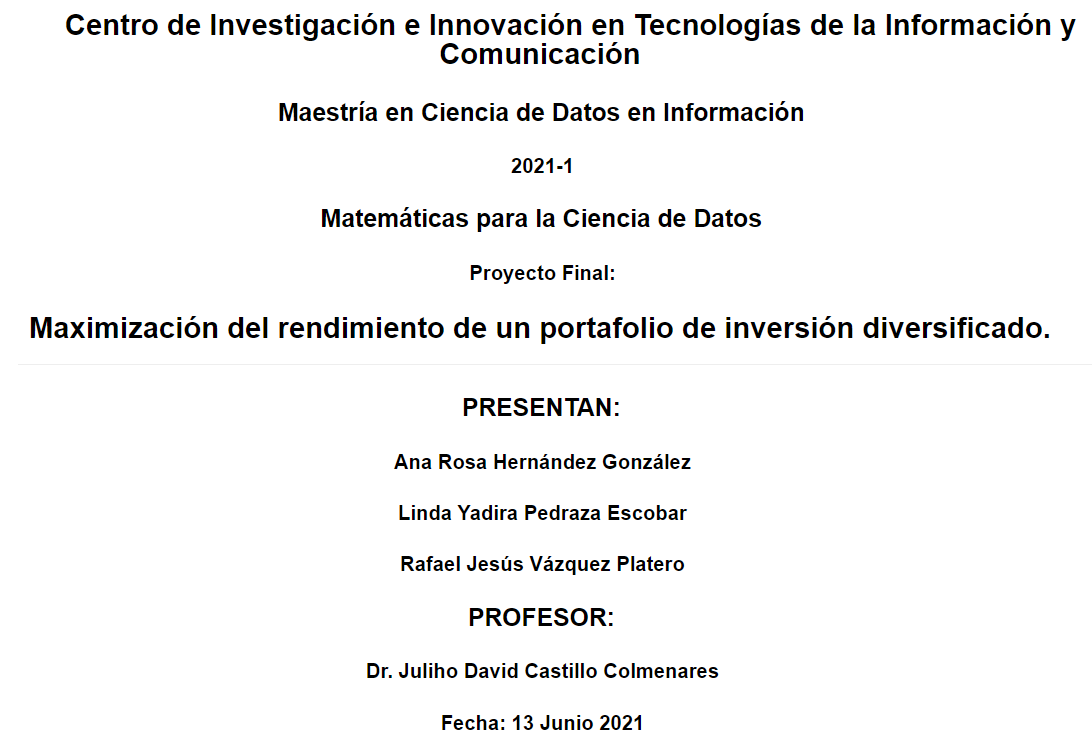

#### 1. Librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import cvxpy as cp
import os

#### 2. Carga de *Precios* y *Sectores*

In [2]:
Precios = pd.read_excel(os.getcwd() + '\\HistóricoPreciosIPC.xlsx', index_col=0, sheet_name='Precios', engine='openpyxl',)
Sectores = pd.read_excel(os.getcwd() + '\\HistóricoPreciosIPC.xlsx', sheet_name='Sectores', engine='openpyxl',)

In [3]:
Precios

,1_AC_*,1_ALFA_A,1_ALSEA_*,1_AMX_L,1_ASUR_B,1_BIMBO_A,1_BOLSA_A,1_CEMEX_CPO,1_CUERVO_*,1_ELEKTRA_*,...,1_ORBIA_*,1_PE&OLES_*,1_PINFRA_*,1_Q_*,1_R_A,1_SITES_B-1,1_TLEVISA_CPO,1_VESTA_*,1_WALMEX_*,41_BBAJIO_O
2020-05-18,101.14,11.29,19.08,15.44,250.14,37.00,41.24,4.72,38.87,1402.82,...,32.75,198.45,167.58,91.40,59.00,15.15,26.25,32.07,58.48,21.03
2020-05-19,98.16,11.17,18.58,14.60,229.75,35.99,41.33,4.65,38.61,1380.06,...,31.03,204.51,160.60,92.02,59.13,14.82,25.14,31.32,56.42,19.85
2020-05-20,96.80,10.96,18.67,14.90,231.64,35.88,41.55,4.83,35.52,1372.10,...,30.59,211.08,158.32,91.05,59.73,14.79,25.29,30.86,56.33,20.16
2020-05-21,94.96,11.64,18.63,14.51,226.14,35.72,41.21,4.85,36.08,1371.38,...,30.09,207.28,152.05,92.38,58.65,14.70,24.76,29.95,55.76,19.97
2020-05-22,94.39,11.68,18.48,14.67,227.81,35.54,42.20,4.77,35.69,1366.36,...,30.04,209.19,156.42,90.97,59.76,14.47,24.94,30.03,55.81,20.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-11,109.12,13.95,31.91,14.87,367.20,40.51,46.48,17.10,47.63,1611.09,...,56.68,285.21,156.65,110.52,99.83,18.86,50.10,39.34,63.14,30.00
2021-05-12,107.84,13.55,31.82,14.74,362.53,40.50,44.67,15.93,48.00,1603.66,...,55.44,276.52,154.44,106.24,99.48,18.97,49.53,39.24,62.66,30.39
2021-05-13,108.47,13.81,31.97,14.76,359.26,39.78,44.07,16.14,47.98,1609.79,...,55.64,276.72,153.70,106.66,100.90,19.01,49.55,39.21,61.75,31.28
2021-05-14,108.87,13.89,32.13,14.67,371.53,39.01,44.54,16.62,47.49,1608.03,...,56.93,275.59,154.09,107.66,101.31,18.66,50.42,39.76,62.08,31.04


In [4]:
#Se muestran los sectores a los que pertenecen las acciones
Sectores

,Acción,Sector
0,1_AC_*,Consumer Staples
1,1_ALFA_A,Industrials
2,1_ALSEA_*,Consumer Discretionary
3,1_AMX_L,Communication Services
4,1_ASUR_B,Industrials
5,1_BIMBO_A,Consumer Staples
6,1_BOLSA_A,Financials
7,1_CEMEX_CPO,Materials
8,1_CUERVO_*,Consumer Staples
9,1_ELEKTRA_*,Financials


#### 3. Rendimientos asociados

In [5]:
#Se obtienen los rendimientos diarios para todas las acciones
Rendimientos = pd.DataFrame(columns=Precios.columns, index=Precios.index[1::])
for i in range(len(Precios)-1):
    Rendimientos.iloc[i,:] = np.log(Precios.iloc[i+1,:]/Precios.iloc[i,:])    

In [6]:
Rendimientos

,1_AC_*,1_ALFA_A,1_ALSEA_*,1_AMX_L,1_ASUR_B,1_BIMBO_A,1_BOLSA_A,1_CEMEX_CPO,1_CUERVO_*,1_ELEKTRA_*,...,1_ORBIA_*,1_PE&OLES_*,1_PINFRA_*,1_Q_*,1_R_A,1_SITES_B-1,1_TLEVISA_CPO,1_VESTA_*,1_WALMEX_*,41_BBAJIO_O
2020-05-19,-0.0299069,-0.0106858,-0.0265549,-0.05594,-0.085029,-0.0276768,0.00217997,-0.0149416,-0.00671143,-0.0163575,...,-0.0539485,0.0300797,-0.042544,0.00676047,0.00220097,-0.0220229,-0.0432058,-0.0236641,-0.0358611,-0.057746
2020-05-20,-0.0139518,-0.0189793,0.00483222,0.0203397,0.00819268,-0.00306108,0.00530889,0.0379792,-0.0834154,-0.00578456,...,-0.0142813,0.0316203,-0.0142985,-0.0105971,0.010096,-0.00202634,0.00594886,-0.014796,-0.00159645,0.0154964
2020-05-21,-0.0191912,0.0601952,-0.00214477,-0.0265231,-0.0240302,-0.00446928,-0.00821658,0.00413224,0.0156428,-0.000524881,...,-0.0164803,-0.0181667,-0.0404089,0.0145017,-0.0182468,-0.00610378,-0.0211796,-0.0299315,-0.0101705,-0.0094693
2020-05-22,-0.00602061,0.00343054,-0.00808412,0.0109665,0.00735767,-0.00505193,0.0237393,-0.0166324,-0.0108682,-0.00366726,...,-0.00166306,0.00917239,0.0283353,-0.0153807,0.018749,-0.01577,0.00724349,0.00266756,0.000896298,0.0261937
2020-05-25,0.0486943,0.0025652,-0.024652,0.010173,-0.00709238,-0.00790965,0.0284999,0,0.0357771,-0.00027815,...,-0.00936462,0.00315006,0.00166081,0.0083197,-0.0262794,-0.00902471,-0.00482316,0.02174,-0.00233205,0.0178878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-11,-0.00329369,-0.00143267,-0.0136946,0.00878087,-0.00513386,-0.00344998,0.0134288,0.012949,-0.007113,0.00162755,...,-0.00562985,-0.0174824,-0.00235917,0.00335343,-0.000100165,-0.017867,-0.00854621,-0.00860547,-0.012747,-0.0125871
2021-05-12,-0.0117995,-0.029093,-0.00282442,-0.00878087,-0.0127994,-0.000246883,-0.03972,-0.0708743,0.0077382,-0.00462245,...,-0.0221201,-0.0309426,-0.0142083,-0.0394958,-0.00351212,0.00581551,-0.0114425,-0.00254518,-0.0076312,0.0129162
2021-05-13,0.00582499,0.0190064,0.00470294,0.00135593,-0.00906087,-0.0179377,-0.0135229,0.0130965,-0.000416753,0.00381522,...,0.00360101,0.000723014,-0.00480302,0.00394552,0.0141733,0.00210637,0.000403714,-0.000764818,-0.0146293,0.0288653
2021-05-14,0.00368087,0.00577619,0.00499221,-0.00611623,0.0335833,-0.0195462,0.0106084,0.0293061,-0.0102651,-0.00109391,...,0.0229201,-0.00409191,0.0025342,0.00933191,0.0040552,-0.018583,0.0174057,0.0139296,0.0053299,-0.00770222


In [7]:
#Se calculan los rendimientos anualizados para cada acción
Rend_anual = Rendimientos.mean() * 252
#Se unen los rendimientos con 
Sectores = Sectores.merge(Rend_anual.to_frame(name="Rendimiento"), left_on='Acción', right_index=True)

#### 4. Rendimientos máximos por acción

In [8]:
#Se obtiene la acción con el máximo rendimiento para cada Sector
#Se crea un dataframe con estas acciones
acciones = pd.DataFrame()
for i in Sectores['Sector'].unique():
    acciones=acciones.append(Sectores.loc[Sectores[Sectores['Sector'] == i]['Rendimiento'].idxmax()],ignore_index=True)

In [9]:
acciones

,Acción,Rendimiento,Sector
0,1_CUERVO_*,0.198766,Consumer Staples
1,1_GAP_B,0.463440,Industrials
2,1_ALSEA_*,0.526346,Consumer Discretionary
3,1_TLEVISA_CPO,0.648730,Communication Services
4,1_GFNORTE_O,0.603341,Financials
5,1_CEMEX_CPO,1.278803,Materials
6,1_IENOVA_*,0.332858,Utilities
7,1_LAB_B,-0.044763,Health Care
8,1_VESTA_*,0.208447,Real Estate


#### 5. Exclusión de acciones con rendimientos bajos (rendimientos no útiles)

In [10]:
#Se eliminan las acciones cuyo rendimiento sea menor o igual a cero
#En este caso, eliminamos la acción LAB, quedando el portafolio de la siguiente forma
acciones = acciones.drop(acciones[acciones['Rendimiento'] <= 0].index)
#Se resetean los valores del índice
acciones.index = range(acciones.shape[0])
acciones

,Acción,Rendimiento,Sector
0,1_CUERVO_*,0.198766,Consumer Staples
1,1_GAP_B,0.463440,Industrials
2,1_ALSEA_*,0.526346,Consumer Discretionary
3,1_TLEVISA_CPO,0.648730,Communication Services
4,1_GFNORTE_O,0.603341,Financials
5,1_CEMEX_CPO,1.278803,Materials
6,1_IENOVA_*,0.332858,Utilities
7,1_VESTA_*,0.208447,Real Estate


#### 6. Varianza y Desviación estándar

In [11]:
#Se agrega una columna con el valor de la varianza anualizada
j = 0
for i in acciones['Acción']:
    acciones.loc[j,'Varianza'] = Rendimientos[i].var(ddof=0)*252
    j += 1
    
#Se agrega una comlumna con el valor de la desciación estándar anualizada
j = 0
for i in acciones['Acción']:
    acciones.loc[j,'Desv Est'] = Rendimientos[i].std(ddof=0)*np.sqrt(252)
    j += 1

In [12]:
acciones

,Acción,Rendimiento,Sector,Varianza,Desv Est
0,1_CUERVO_*,0.198766,Consumer Staples,0.106608,0.326509
1,1_GAP_B,0.463440,Industrials,0.160066,0.400083
2,1_ALSEA_*,0.526346,Consumer Discretionary,0.153828,0.392210
3,1_TLEVISA_CPO,0.648730,Communication Services,0.255537,0.505507
4,1_GFNORTE_O,0.603341,Financials,0.169688,0.411931
5,1_CEMEX_CPO,1.278803,Materials,0.211428,0.459813
6,1_IENOVA_*,0.332858,Utilities,0.087537,0.295866
7,1_VESTA_*,0.208447,Real Estate,0.078770,0.280660


#### 7. Matriz de varianza-covarianza

In [13]:
#Se construye la matriz de Varianza-Covarianza
var_cov = (Rendimientos[acciones['Acción'].tolist()].astype(float)).cov(ddof=0)*252
var_cov

,1_CUERVO_*,1_GAP_B,1_ALSEA_*,1_TLEVISA_CPO,1_GFNORTE_O,1_CEMEX_CPO,1_IENOVA_*,1_VESTA_*
1_CUERVO_*,0.106608,0.007681,0.015213,0.012487,0.006505,0.006360,0.022385,0.008487
1_GAP_B,0.007681,0.160066,0.054122,0.065887,0.069781,0.053192,0.024839,0.044759
1_ALSEA_*,0.015213,0.054122,0.153828,0.064484,0.061422,0.033360,0.021488,0.027262
1_TLEVISA_CPO,0.012487,0.065887,0.064484,0.255537,0.073000,0.081411,0.034386,0.035385
1_GFNORTE_O,0.006505,0.069781,0.061422,0.073000,0.169688,0.071822,0.041490,0.047954
1_CEMEX_CPO,0.006360,0.053192,0.033360,0.081411,0.071822,0.211428,0.026275,0.024861
1_IENOVA_*,0.022385,0.024839,0.021488,0.034386,0.041490,0.026275,0.087537,0.017780
1_VESTA_*,0.008487,0.044759,0.027262,0.035385,0.047954,0.024861,0.017780,0.078770


#### 8. Optimización del portafolio

In [14]:
#Para la resolución de este problema se usa la librería cvxpy,
#ya que la restricción para la volatilidad es de tipo cuadrático

# Se obtiene el número de acciones que componen el portafolio
n = var_cov.shape[0]

# Las w serán los pesos de las acciones - variables a optimizar
w = cp.Variable(n)

# Rendimiento del portafolio
ret = (acciones['Rendimiento'].values).T @ w

#La varianza máxima admitida será la varianza mínima de las acciones del portafolio
vol_max = acciones['Varianza'].min()

#Se define la restricción dada por la matriz de varianza-covarianza para la varianza del portafolio
vol_port = cp.quad_form(w, var_cov)

# Resolución del problema de maximización del rendimiento con cvxpy
rend_max = cp.Problem(cp.Maximize(ret),  # maximizar el rendimiento
                  [cp.sum(w) == 1,  #la suma de los pesos debe ser igual a 1
                   vol_port <= vol_max,  #restricción de la varianza del portafolio
                   w >= 0]  #los pesos deben ser mayores o iguales a 0
                 )

rend_max.solve()
pesos = [float('%0.4f' % v) for v in w.value]
vol_port = float('%0.6f' % vol_max)

#### 9. Portafolio de inversión por acción y monto

In [15]:
#Se crea la columna para visualizar el peso de cada acción en el portafolio
acciones['Pesos'] = pesos
acciones['Inversión'] = acciones['Pesos'] * 200000
acciones

,Acción,Rendimiento,Sector,Varianza,Desv Est,Pesos,Inversión
0,1_CUERVO_*,0.198766,Consumer Staples,0.106608,0.326509,0.1209,24180.0
1,1_GAP_B,0.463440,Industrials,0.160066,0.400083,0.0229,4580.0
2,1_ALSEA_*,0.526346,Consumer Discretionary,0.153828,0.392210,0.1782,35640.0
3,1_TLEVISA_CPO,0.648730,Communication Services,0.255537,0.505507,0.0039,780.0
4,1_GFNORTE_O,0.603341,Financials,0.169688,0.411931,0.0148,2960.0
5,1_CEMEX_CPO,1.278803,Materials,0.211428,0.459813,0.4978,99560.0
6,1_IENOVA_*,0.332858,Utilities,0.087537,0.295866,0.1539,30780.0
7,1_VESTA_*,0.208447,Real Estate,0.078770,0.280660,0.0074,1480.0


#### 10. Conclusiones

In [16]:
print('El rendimiento máximo del portafolio es: ')
print(float('%0.6f' % rend_max.solve())*100,'%')
print('La varianza del portafolio es: ')
print(float('%0.6f' % (vol_port*100)),'%')
print('La desviación estandar del portafolio es: ')
print(float('%0.6f' % (np.sqrt(vol_port)*100)),'%')

El rendimiento máximo del portafolio es: 
82.9374 %
La varianza del portafolio es: 
7.877 %
La desviación estandar del portafolio es: 
28.065994 %


Al obtener la solución del ejercicio, se puede observar que el rendimiento obtenido es muy superior al de casi todas las acciones seleccionadas para el portafolio, éste sólo está por debajo del de la acción *1_CEMEX_CPO*.

También se aprecia que la varianza es igual que la de la acción con mínima varianza seleccionada, *1_VESTA_* *, cumpliendo con la restricción propuesta. Dichos resultados son satisfactorios ya que gracias a la diversificación, se obtiene un excelente rendimiento con un riesgo muy bajo.


#### 11. Video tutorial
Como referencia del proyecto consultar el video tutorual disponible en:
https://youtu.be/2Iw1QZ1EH6w